In [1]:
import numpy as np
import DPGradDescent as GD
import DPNoisyStat as NS
import DPTheilSen as TS 
import statsmodels.api as sm
import matplotlib.pyplot as plt

In [2]:
eps = 1.0  
n = 10
varx = 0.05  
barx = 0.5  
vare = 0.005 
slope = 0.5 
intercept = 0.2  

x = []
y = []
for i in range(n):
    x.append(np.random.normal(barx, np.sqrt(varx)))
    y.append(slope * x[i] + intercept + np.random.normal(0, np.sqrt(vare)))
x = np.array(x)
y = np.array(y)

In [3]:
X = sm.add_constant(x)
model = sm.OLS(y, X).fit()
std = model.bse
stderr = std[1]

In [4]:
mask = (x >= 0) & (x <= 1)
x = x[mask]
y = y[mask]
n = len(x)

In [5]:
xm = x.mean()
ym = y.mean()

In [6]:
true_x = 0.5 * 0.25 + 0.2
true_y = 0.5 * 0.75 + 0.2 
true_x, true_y

(0.325, 0.575)

In [7]:
# get OLS predict at 0.25
x_new = [0.25, 0.75]
y_ols = model.predict(x_new)
p_25ols = y_ols[0] 

sigma_p_25 = np.sqrt(1/n + (x_new[0] - xm)**2 / np.dot(x, x)) * np.linalg.norm(y - model.params[0] - model.params[1] * x) / np.sqrt(n - 2)

In [8]:
c_list = [10] 

gdzcdp = []
gdpure = []
gdapprox =[]
ts_exp = []
ts_exp_wide = []
ts_ss = []
noista = []

used_dict = {
    GD.DPGDzCDP : gdzcdp, 
    GD.DPGDPure : gdpure, 
    GD.DPGDApprox : gdapprox, 
    TS.DPTheilSenExp : ts_exp,
    TS.DPTheilSenWide : ts_exp_wide,
    TS.DPTheilSenSS : ts_ss,
    # NS.NoisyStat : noista
}

def chooseDPAlgorithm(x, y, xm, ym, n, eps, xnew):
    for dp, er_list in used_dict.items():
        for c in c_list:
            percent_of_dataset = 0
            for _ in range (100):
                sum_of_smaller_than_c = 0
                for _ in range (100):
                    try:
                        if (np.abs(dp(x, y, xm, ym, n, eps, x_new)[0] - p_25ols) <= c * sigma_p_25):
                            sum_of_smaller_than_c += 1
                    except:
                        print(dp)
                if sum_of_smaller_than_c >= 68: 
                    percent_of_dataset += 1
                    # print(sum_of_smaller_than_c)
            er_list.append(percent_of_dataset)

In [9]:
chooseDPAlgorithm(x, y, xm, ym, n, eps, x_new)

In [11]:
pattern_fig={
    'gdzcdp':gdzcdp,
    'gdpure':gdpure,
    'gdapprox':gdapprox,
    'ts_exp':ts_exp,
    'ts_exp_wide':ts_exp_wide,
    'ts_ss':ts_ss,
}

C:\Users\PC\AppData\Local\Temp\ipykernel_5796\3213819729.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  barplot=sns.barplot(y=list(pattern_fig.keys()), x=[np.mean(i) for i in pattern_fig.values()], palette='viridis')


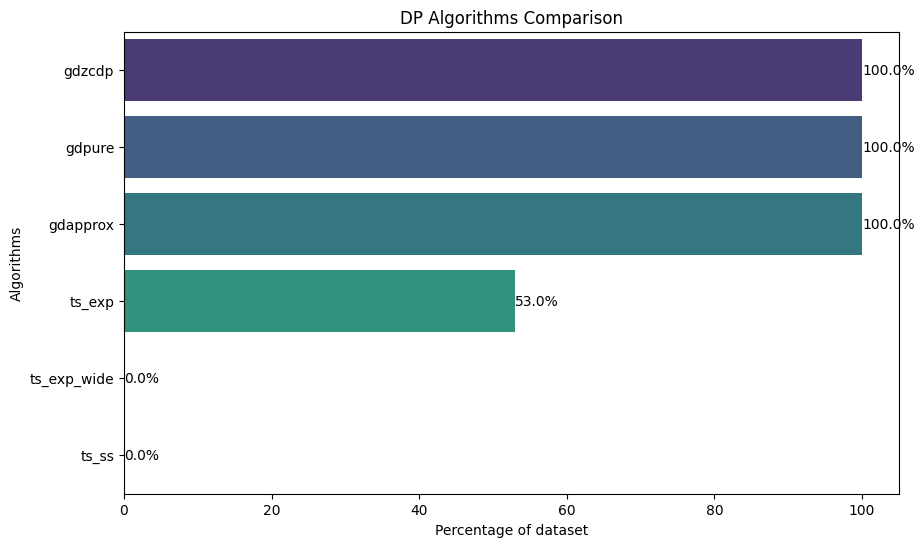

In [24]:
import seaborn as sns
plt.figure(figsize=(10, 6))
barplot=sns.barplot(y=list(pattern_fig.keys()), x=[np.mean(i) for i in pattern_fig.values()], palette='viridis')
for index, value in enumerate([np.mean(i) for i in pattern_fig.values()]):
    barplot.text(value, index, f'{value}%', color='black', ha="left", va="center")
plt.title('DP Algorithms Comparison')
plt.xlabel('Percentage of dataset')
plt.ylabel('Algorithms')
plt.show()

In [21]:
numbers_of_sample = np.random.randint(30, 100001, 1)
sigma_x = np.random.uniform(0.003, 0.03, 5)
epsilon = np.random.uniform(0.1, 10, 5)

In [24]:
# Varying n
def varyingN(used_dict, numbers_of_sample):
    for dp, er_list in used_dict:
        for n in numbers_of_sample:
            for c in c_list:
                for _ in range(100):
                    if (np.abs(dp(x, y, xm, ym, n, eps, x_new)[0] - p_25ols) <= c * 0.08):
                        sum_of_smaller_than_c += 1
                
                if sum_of_smaller_than_c >= 68: 
                    er_list.append(c)
                break

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(numbers_of_sample, gdzcdp, label='gdzcdp')
plt.plot(numbers_of_sample, gdpure, label='gdpure')
plt.plot(numbers_of_sample, gdapprox, label='gdapprox')
plt.plot(numbers_of_sample, ts_exp, label='ts_exp')
plt.plot(numbers_of_sample, ts_exp_wide, label='ts_exp_wide')
plt.plot(numbers_of_sample, ts_ss, label='ts_ss')
# plt.plot(numbers_of_sample, noista, label='noisystat')

plt.xlabel('Number of samples')
plt.ylabel('C(68) / sigma(p_25)')
plt.title('Line Plot')
plt.legend()

In [ ]:
def varyingSigmaX(used_dict, sigma_x):
    for dp, er_list in used_dict:
        for sigma in sigma_x:
            for c in c_list:
                for _ in range(100):
                    if (np.abs(dp(x, y, xm, ym, n, eps, x_new)[0] - p_25ols) <= c * sigma):
                        sum_of_smaller_than_c += 1
                
                if sum_of_smaller_than_c >= 68: 
                    er_list.append(c)
                break

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(sigma_x, gdzcdp, label='gdzcdp')
plt.plot(sigma_x, gdpure, label='gdpure')
plt.plot(sigma_x, gdapprox, label='gdapprox')
plt.plot(sigma_x, ts_exp, label='ts_exp')
plt.plot(sigma_x, ts_exp_wide, label='ts_exp_wide')
plt.plot(sigma_x, ts_ss, label='ts_ss')
plt.plot(sigma_x, noista, label='noisystat')

plt.xlabel('Sigma_x')
plt.ylabel('C(68) / sigma(p_25)')
plt.title('Line Plot')
plt.legend()

In [ ]:
def varyingEpsilon(used_dict, epsilon):
    for dp, er_list in used_dict:
        for eps in epsilon:
            for c in c_list:
                for _ in range(100):
                    if (np.abs(dp(x, y, xm, ym, n, eps, x_new)[0] - p_25ols) <= c * sigma_p_25):
                        sum_of_smaller_than_c += 1
                
                if sum_of_smaller_than_c >= 68: 
                    er_list.append(c)
                break

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(epsilon, gdzcdp, label='gdzcdp')
plt.plot(epsilon, gdpure, label='gdpure')
plt.plot(epsilon, gdapprox, label='gdapprox')
plt.plot(epsilon, ts_exp, label='ts_exp')
plt.plot(epsilon, ts_exp_wide, label='ts_exp_wide')
plt.plot(epsilon, ts_ss, label='ts_ss')
plt.plot(epsilon, noista, label='noisystat')

plt.xlabel('Epsilon')
plt.ylabel('C(68) / sigma(p_25)')
plt.title('Line Plot')
plt.legend()